## Contenido
1.1. Problema de calidad de los datos.

1.2. Conversiones de datos.

1.3. Filtrado de datos.

1.4. Selección de variables.

## Introducción

![](https://raw.githubusercontent.com/igomezv/CienciaDatosIntermedio/main/img/ML_flow1.png)
Fuente de la imagen: medium.com

## ¿Qué es y por qué es importante el pre-procesamiento?

![](https://raw.githubusercontent.com/igomezv/CienciaDatosIntermedio/main/img/kdd.png)
Flujo de KDD (Knowledge Discovery in Databases).

![](https://raw.githubusercontent.com/igomezv/CienciaDatosIntermedio/main/img/kdd2.png)
Fuente: Han, J., & Kamber, M. (2006). 

![](https://raw.githubusercontent.com/igomezv/CienciaDatosIntermedio/main/img/preprocessing.png)
Fuente de la imagen: Herrera, F. (2016). Big Data: Preprocesamiento y calidad de datos. novática, 237, 17.

![](https://raw.githubusercontent.com/igomezv/CienciaDatosIntermedio/main/img/pastel.png)
Fuente de la imagen: xeridia.com




## ¿Qué problemas pueden tener los datos?

- Datos nulos
- Formatos del archivo, ¿cómo leerlos?
- Tipo de datos incorrectos.

-------

# Problemas en los datos

---------

In [1]:
import numpy as np

In [2]:
lista = [[1,2],[3,4],[5, "na"]]

In [3]:
larray = np.array(lista)

In [4]:
larray * 5

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U21'), dtype('int64')) -> None

#### ¿Por qué nos marca error?

In [5]:
larray, np.shape(larray), type(larray)

(array([['1', '2'],
        ['3', '4'],
        ['5', 'na']], dtype='<U21'),
 (3, 2),
 numpy.ndarray)

#### Investigar dtype=U en https://numpy.org/doc/stable/reference/arrays.dtypes.html 

In [6]:
larray = np.array(lista, dtype='float')#'U21' cambiar tipo de datos.

ValueError: could not convert string to float: 'na'

Identificar dónde está el error

In [7]:
lista[2][1]

'na'

Cambiarlo por un tipo de dato válido

In [8]:
lista[2][1] = np.nan

In [9]:
lista

[[1, 2], [3, 4], [5, nan]]

In [10]:
larray = np.array(lista)

In [11]:
larray, np.shape(larray), type(larray)

(array([[ 1.,  2.],
        [ 3.,  4.],
        [ 5., nan]]),
 (3, 2),
 numpy.ndarray)

Volvamos a multiplicar

In [12]:
larray * 5

array([[ 5., 10.],
       [15., 20.],
       [25., nan]])

 ### Quitar valores nulos con sklearn.preprocessing https://scikit-learn.org/stable/modules/impute.html#impute

In [13]:
from sklearn.impute import SimpleImputer

In [14]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [15]:
imp.fit(larray)

SimpleImputer()

In [16]:
imp.transform(larray)

array([[1., 2.],
       [3., 4.],
       [5., 3.]])

##### Repetir y probar con diferentes estrategias
#### Leer y quitar valores nulos con pandas

In [17]:
import pandas as pd

In [18]:
# lista = [[1,2],[3,4],[5, "na"]]
lista = [[1,2],[3,"cualquiercosa"],[5, 10]]
lista

[[1, 2], [3, 'cualquiercosa'], [5, 10]]

In [19]:
df = pd.DataFrame(lista)

In [20]:
# repasando dataframes de pandas 
# https://www.analyticslane.com/2019/06/21/seleccionar-filas-y-columnas-en-pandas-con-iloc-y-loc/
print(df.iloc[:, 0]) # Primera columna
print(df.iloc[:, 1]) # Segunda columna
df.iloc[:, -1] # Última columna

0    1
1    3
2    5
Name: 0, dtype: int64
0                2
1    cualquiercosa
2               10
Name: 1, dtype: object


0                2
1    cualquiercosa
2               10
Name: 1, dtype: object

Convertir a NAN valores erroneos

In [21]:
df2 = pd.to_numeric(df[1], errors ='coerce')
df2

0     2.0
1     NaN
2    10.0
Name: 1, dtype: float64

In [22]:
df3=df2.dropna()
df3

0     2.0
2    10.0
Name: 1, dtype: float64

In [23]:
df3=df2.dropna(how='any')
df3

0     2.0
2    10.0
Name: 1, dtype: float64

En una sola linea y sustituir valor erróneo con 0

In [24]:
df2 = pd.to_numeric(df[1], errors ='coerce').fillna(0)#.astype('int')
df2

0     2.0
1     0.0
2    10.0
Name: 1, dtype: float64

Sustituir nueva columna en el df original

In [25]:
df.iloc[:, 1] = df2
df

/tmp/ipykernel_8486/3588624327.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, 1] = df2


,0,1
0,1,2.0
1,3,0.0
2,5,10.0


## Cargar un archivo de texto
### Es importante conocer el archivo de texto e inspeccionarlo previamente.

In [26]:
np.loadtxt('https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/datasets/prueba1.csv', 
           skiprows=1, usecols=[4,5,6])

array([[45., 70.,  8.],
       [40., 60.,  7.],
       [44., 55.,  6.],
       [30., 50.,  7.],
       [60., 85.,  9.],
       [55., 65.,  8.],
       [50., 73.,  5.],
       [33., 70.,  8.]])

In [27]:
np.loadtxt('https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/datasets/prueba2.csv', 
           skiprows=1, usecols=[4,5,6]) #, delimiter=',')

ValueError: invalid column index 4 at row 1 with 1 columns

¿Por qué marca error?

Enfatizar en la importancia de conocer el tipo de archivo que se está leyendo. Comentar sobre editores de texto.

In [28]:
pd.read_csv('https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/datasets/prueba2.csv')

,Nombre,Apellido,Estado,Genero,Edad,Peso,Horas de sueño
0,Juan,Perez,Veracruz,M,45,70,8
1,María,Gómez,Puebla,F,40,60,7
2,Jimena,Rodríguez,Veracruz,F,44,55,6
3,Alfredo,Hernández,México,M,30,50,7
4,Luis,hernandez,México,M,60,85,9
5,Gabriela,perez,Hidalgo,F,55,65,8
6,Enrique,García,Veracruz,M,50,73,5
7,Laura,Zamora,Puebla,F,33,70,8


## Conversión de datos
Referencia: https://www.programiz.com/python-programming/type-conversion-and-casting 

In [29]:
# Ejemplo 1
num_int = 123
num_flo = 1.23

num_new = num_int + num_flo

print("Tipo de datos de num_int:",type(num_int))
print("Tipo de datos de num_flo:",type(num_flo))

print("Valor de num_new:",num_new)
print("Tipo de datos de num_new:",type(num_new))

Tipo de datos de num_int: <class 'int'>
Tipo de datos de num_flo: <class 'float'>
Valor de num_new: 124.23
Tipo de datos de num_new: <class 'float'>


In [30]:
# Ejemplo 2
num_int = 123
num_str = "456"

print("Tipo de datos de num_int:",type(num_int))
print("Tipo de datos de num_str:",type(num_str))

print(num_int+num_str)

Tipo de datos de num_int: <class 'int'>
Tipo de datos de num_str: <class 'str'>


TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [31]:
# Ejemplo 3
num_int = 123
num_str = "456"

print("Tipo de dato de num_int:",type(num_int))
print("Tipo de dato de num_str antes del Type Casting:",type(num_str))

num_str = int(num_str)
print("Tipo de dato de num_str después del Type Casting:",type(num_str))

num_sum = num_int + num_str

print("Suma de num_int y num_str:",num_sum)
print("Tipo de dato de la suma:",type(num_sum))

Tipo de dato de num_int: <class 'int'>
Tipo de dato de num_str antes del Type Casting: <class 'str'>
Tipo de dato de num_str después del Type Casting: <class 'int'>
Suma de num_int y num_str: 579
Tipo de dato de la suma: <class 'int'>


In [32]:
# Ejemplo 4
lista = [10,22,33,44,55]
nparray = np.array(lista)
df = pd.DataFrame(lista)
type(lista), type(nparray), type(df)

(list, numpy.ndarray, pandas.core.frame.DataFrame)

In [33]:
lista2 = list(nparray)
lista2, type(lista2)

([10, 22, 33, 44, 55], list)

In [34]:
lista3 = list(df)
lista3, type(lista3), type(lista3[0])

([0], list, int)

In [35]:
lista4 = list(df.values)
lista4, type(lista4)

([array([10]), array([22]), array([33]), array([44]), array([55])], list)

### Filtrado de datos
https://numpy.org/doc/stable/reference/routines.sort.html

In [36]:
import numpy as np
array = np.arange(1, 29, 3)
array

array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28])

#### Seleccionar por índice un elemento

In [37]:
array[1]

4

#### Seleccionar un rango de elementos

In [38]:
array[2:6]

array([ 7, 10, 13, 16])

#### Seleccionar los primeros 5 elementos

In [39]:
array[:5]

array([ 1,  4,  7, 10, 13])

### Arreglos 2D

In [40]:
## Matrices
array = np.random.randint(1, 15, (3,3))
array

array([[ 4, 10, 11],
       [ 6,  7,  7],
       [12,  8, 10]])

In [41]:
array[0, 1]

10

In [42]:
array[1, :]

array([6, 7, 7])

#### Con condiciones

In [43]:
array[array < 5]

array([4])

In [44]:
# OR
array[(array < 5) | (array > 9)]

array([ 4, 10, 11, 12, 10])

In [45]:
#filter for values greater than 5 and less than 9
array[(array > 5) & (array < 9)]

array([6, 7, 7, 8])

In [46]:
#filtrar filas to 2, 3, 5
filtro = np.asarray([2,3,5])
mask = np.in1d(array[:, 1], filtro)
array[mask]
# 

array([], shape=(0, 3), dtype=int64)

In [47]:
# Condiciones más complejas
array2 = array[np.where(array % 2 == 0)]
array2, np.shape(array2)

(array([ 4, 10,  6, 12,  8, 10]), (6,))

In [48]:
## Con mascara
condition = np.mod(array, 3)==0
condition

array([[False, False, False],
       [ True, False, False],
       [ True, False, False]])

In [49]:
np.extract(condition, array)

array([ 6, 12])

In [50]:
array[condition]

array([ 6, 12])

In [51]:
arr = np.random.randint(1, 10, (2,3))
arr


array([[2, 5, 2],
       [8, 7, 2]])

In [52]:
np.place(arr, arr>5, [44, 55])
arr

array([[ 2,  5,  2],
       [44, 55,  2]])

### Filtros de datos con pandas

In [53]:
df = pd.read_csv('https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/datasets/faltantes.csv')
df

,Nombre,Apellido,Estado,Genero,Edad,Peso,Horas de sueño
0,Juan,Perez,Veracruz,M,45.0,70.0,8.0
1,María,Gómez,Puebla,F,40.0,60.0,7.0
2,Jimena,Rodríguez,Veracruz,F,NaN,55.0,6.0
3,Alfredo,Hernández,México,M,30.0,NaN,NaN
4,Luis,hernandez,México,M,60.0,85.0,9.0
5,Gabriela,perez,Hidalgo,F,55.0,65.0,NaN
6,Enrique,García,Veracruz,M,50.0,73.0,5.0
7,Laura,Zamora,Puebla,F,33.0,70.0,8.0


In [54]:
femenino = df['Genero'] == 'F'
femenino.head()

0    False
1     True
2     True
3    False
4    False
Name: Genero, dtype: bool

In [55]:
df_fem = df[femenino]
df_fem.head()

,Nombre,Apellido,Estado,Genero,Edad,Peso,Horas de sueño
1,María,Gómez,Puebla,F,40.0,60.0,7.0
2,Jimena,Rodríguez,Veracruz,F,NaN,55.0,6.0
5,Gabriela,perez,Hidalgo,F,55.0,65.0,NaN
7,Laura,Zamora,Puebla,F,33.0,70.0,8.0


In [56]:
# mas directo
df_fem = df[df['Genero'] == "F"]
df_fem

,Nombre,Apellido,Estado,Genero,Edad,Peso,Horas de sueño
1,María,Gómez,Puebla,F,40.0,60.0,7.0
2,Jimena,Rodríguez,Veracruz,F,NaN,55.0,6.0
5,Gabriela,perez,Hidalgo,F,55.0,65.0,NaN
7,Laura,Zamora,Puebla,F,33.0,70.0,8.0


In [57]:
df_null = df[df.Edad.isnull()] 
df_null.head()
# Probar con horas de sueño

,Nombre,Apellido,Estado,Genero,Edad,Peso,Horas de sueño
2,Jimena,Rodríguez,Veracruz,F,NaN,55.0,6.0


In [58]:
df_notnull = df[df.Edad.notnull()] 
df_notnull.head()

,Nombre,Apellido,Estado,Genero,Edad,Peso,Horas de sueño
0,Juan,Perez,Veracruz,M,45.0,70.0,8.0
1,María,Gómez,Puebla,F,40.0,60.0,7.0
3,Alfredo,Hernández,México,M,30.0,NaN,NaN
4,Luis,hernandez,México,M,60.0,85.0,9.0
5,Gabriela,perez,Hidalgo,F,55.0,65.0,NaN


In [59]:
# Filtrar por condicion
df_filtered = df[df.Edad.isin([40, 45])]
df_filtered


,Nombre,Apellido,Estado,Genero,Edad,Peso,Horas de sueño
0,Juan,Perez,Veracruz,M,45.0,70.0,8.0
1,María,Gómez,Puebla,F,40.0,60.0,7.0


In [60]:
df_filtered = df[~df.Edad.isin([40, 45])]
df_filtered
        

,Nombre,Apellido,Estado,Genero,Edad,Peso,Horas de sueño
2,Jimena,Rodríguez,Veracruz,F,NaN,55.0,6.0
3,Alfredo,Hernández,México,M,30.0,NaN,NaN
4,Luis,hernandez,México,M,60.0,85.0,9.0
5,Gabriela,perez,Hidalgo,F,55.0,65.0,NaN
6,Enrique,García,Veracruz,M,50.0,73.0,5.0
7,Laura,Zamora,Puebla,F,33.0,70.0,8.0


In [61]:
### union de varias condiciones
df_combined = df[df.Edad.isin([40, 45]) & df.Edad.notnull()]
df_combined

,Nombre,Apellido,Estado,Genero,Edad,Peso,Horas de sueño
0,Juan,Perez,Veracruz,M,45.0,70.0,8.0
1,María,Gómez,Puebla,F,40.0,60.0,7.0


## Selección de variables

- ¿Qué variables no aportan información?

- ¿Hay variables muy correlacionadas?, ¿Se pueden reducir variables?



In [62]:
df = pd.read_csv('datasets/prueba2.csv')
df

,Nombre,Apellido,Estado,Genero,Edad,Peso,Horas de sueño
0,Juan,Perez,Veracruz,M,45,70,8
1,María,Gómez,Puebla,F,40,60,7
2,Jimena,Rodríguez,Veracruz,F,44,55,6
3,Alfredo,Hernández,México,M,30,50,7
4,Luis,hernandez,México,M,60,85,9
5,Gabriela,perez,Hidalgo,F,55,65,8
6,Enrique,García,Veracruz,M,50,73,5
7,Laura,Zamora,Puebla,F,33,70,8


#### Explorar visualmente

In [63]:
import seaborn as sns

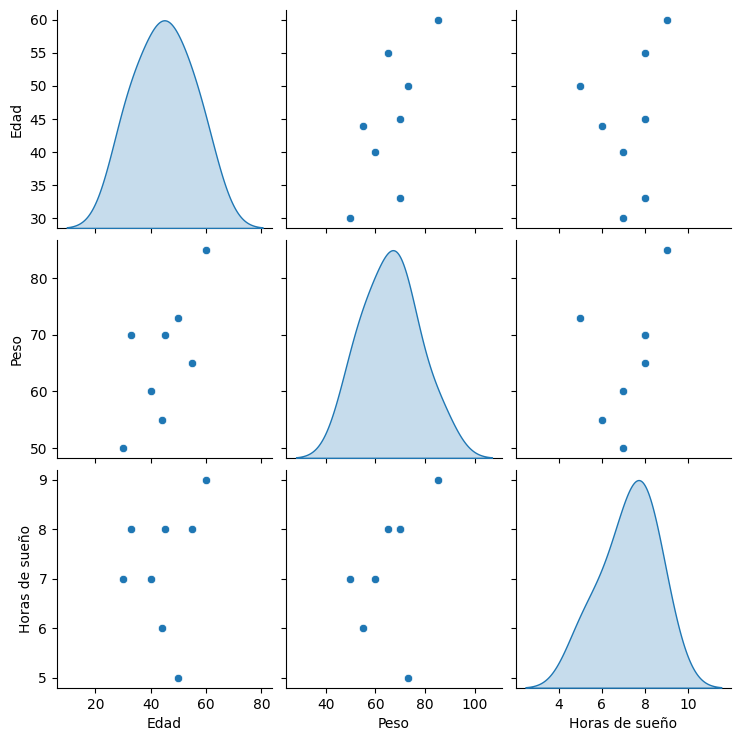

In [64]:
sns.pairplot(df, diag_kind="kde")

In [65]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X, y = load_iris(return_X_y=True)
X.shape

(150, 4)

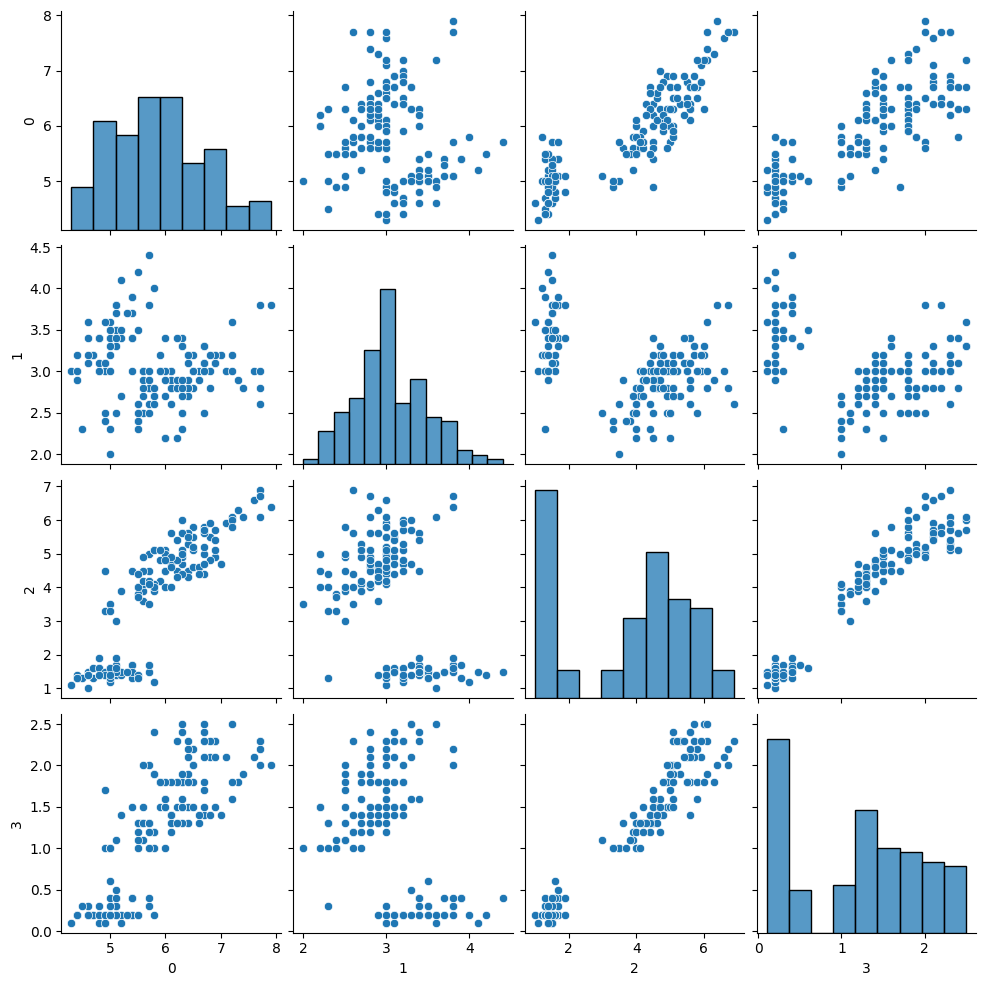

In [66]:
sns.pairplot(pd.DataFrame(X))

#### Calcular correlaciones

Ver https://www.statology.org/correlation-in-python/ 

In [67]:
np.corrcoef(df['Edad'], df['Peso'])

array([[1.        , 0.68047624],
       [0.68047624, 1.        ]])

In [68]:
# con pandas df
df.corr()

/tmp/ipykernel_8486/2936627198.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Edad,Peso,Horas de sueño
Edad,1.000000,0.680476,0.213535
Peso,0.680476,1.000000,0.423315
Horas de sueño,0.213535,0.423315,1.000000


Analizar qué variables se usaron para calcular las correlaciones

In [69]:
df['Edad'].corr(df['Peso']) # a pares

0.6804762399210915

In [70]:
df_iris = pd.DataFrame(X)
df_iris.corr()

,0,1,2,3
0,1.000000,-0.117570,0.871754,0.817941
1,-0.117570,1.000000,-0.428440,-0.366126
2,0.871754,-0.428440,1.000000,0.962865
3,0.817941,-0.366126,0.962865,1.000000


### Categoricas

Usando prueba Chi-cuadrada, donde la Hipotesis nula es:

H0: Las variables no están correlacionadas una con la otra.

Si el P-value es mayor que 0.05, entonces H0 se acepta. Lo cual significaría que las variables no están correlacionadas.Si el valor del P-value es muy cercano a 0, menor a 0.5, las variables sí estarían correlacionadas.

In [71]:
# Fuente: https://thinkingneuron.com/how-to-measure-the-correlation-between-two-categorical-variables-in-python/

CrosstabResult=pd.crosstab(index=df['Genero'],columns=df['Estado'])

print(CrosstabResult)
 
# importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
# P-Value is the Probability of H0 being True
# If P-Value&gt;0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

Estado  Hidalgo  México  Puebla  Veracruz
Genero                                   
F             1       0       2         1
M             0       2       0         2
The P-Value of the ChiSq Test is: 0.14895400671141978


Ver más en: https://scikit-learn.org/stable/modules/feature_selection.html

#### Escalamiento y estandarización

In [72]:
from sklearn.preprocessing import MinMaxScaler
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler()
scaler.fit(data)

MinMaxScaler()

In [73]:
print(scaler.data_max_)

[ 1. 18.]


In [74]:
print(scaler.transform(data))

[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]


In [75]:
scaler.transform([[2, 2]])

array([[1.5, 0. ]])

In [76]:
from sklearn.preprocessing import StandardScaler
# standard scaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler2 = StandardScaler()
scaler2.fit(data)

StandardScaler()

In [77]:
print(scaler2.mean_)

[-0.125  9.   ]


In [78]:
print(scaler2.transform(data))

[[-1.18321596 -1.18321596]
 [-0.50709255 -0.50709255]
 [ 0.16903085  0.16903085]
 [ 1.52127766  1.52127766]]


In [79]:
scaler2.transform([[2, 2]])

array([[ 2.87352447, -1.18321596]])

## Práctica

Leer el archivo iris_bad.data, quitar valores erroneos, hacer un anális exploratorio y contestar las siguientes preguntas:

- ¿Hay alguna correlación fuerte entre las variables numéricas?
- ¿Consideras necesario eliminar una variable?
- ¿Consideras necesario estandarizar una variable?

In [82]:
df = pd.read_csv('https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/datasets/iris/iris_bad.data')
df.head(10)

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,na,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa
